# Use pre-trained word embeddings
In this notebook, we will look at how to use existing pre-trained word embeddings to represent words. In particular, we will employ the *gensim* library, which not only allows for quick loading of pre-trained embeddings, but also supports some common operations on word embeddings. e.g. find the most similar word to a given word. 

In [1]:
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA


Gensim supports most widely used pre-trained embeddings. Below we first show how to use gensim to load pre-trained word2vec embeddings. You need to first download the word2vec compressed file from [here](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing), extract it, and put the extracted .bin file at your wanted place.

**NOTE**: loading the embedding may take a few minutes and would require a few GBs of RAM.

In [2]:
# load pretrained word2vec
from gensim.test.utils import datapath
from gensim.models import KeyedVectors
path_of_downloaded_bin = "/home/cim/staff/uhac002/Library/Embeddings/word2vec/GoogleNews-vectors-negative300.bin"
word_vectors = KeyedVectors.load_word2vec_format(datapath(path_of_downloaded_bin), binary=True)

The code below shows how to load glove embeddings. Again, you first need to download the pre-trained embeddings file from [here](http://nlp.stanford.edu/data/glove.6B.zip), unzip it and put the extracted files at your wanted place. Note that a few different versions of embeddings will be extracted. 

In [3]:
# loading pretrained glove requires a few more lines

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# here I load the 100-dimension vectors; loading longer embeddings would require longer time and more RAM
path_of_downloaded_files = "/home/cim/staff/uhac002/Library/Embeddings/GloVe/glove.6B.100d.txt"

glove_file = datapath(path_of_downloaded_files)
word2vec_glove_file = get_tmpfile("glove.6B.100d.txt")
glove2word2vec(glove_file, word2vec_glove_file)
word_vectors = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [4]:
# check vocabulary
print(len(list(word_vectors.vocab)))
'apple' in word_vectors.vocab

400000


True

In [5]:
# get the word embedding for a specific word
vector = word_vectors['computer']  # numpy vector of a word
print(vector.shape)
print(vector)

(100,)
[-1.6298e-01  3.0141e-01  5.7978e-01  6.6548e-02  4.5835e-01 -1.5329e-01
  4.3258e-01 -8.9215e-01  5.7747e-01  3.6375e-01  5.6524e-01 -5.6281e-01
  3.5659e-01 -3.6096e-01 -9.9662e-02  5.2753e-01  3.8839e-01  9.6185e-01
  1.8841e-01  3.0741e-01 -8.7842e-01 -3.2442e-01  1.1202e+00  7.5126e-02
  4.2661e-01 -6.0651e-01 -1.3893e-01  4.7862e-02 -4.5158e-01  9.3723e-02
  1.7463e-01  1.0962e+00 -1.0044e+00  6.3889e-02  3.8002e-01  2.1109e-01
 -6.6247e-01 -4.0736e-01  8.9442e-01 -6.0974e-01 -1.8577e-01 -1.9913e-01
 -6.9226e-01 -3.1806e-01 -7.8565e-01  2.3831e-01  1.2992e-01  8.7721e-02
  4.3205e-01 -2.2662e-01  3.1549e-01 -3.1748e-01 -2.4632e-03  1.6615e-01
  4.2358e-01 -1.8087e+00 -3.6699e-01  2.3949e-01  2.5458e+00  3.6111e-01
  3.9486e-02  4.8607e-01 -3.6974e-01  5.7282e-02 -4.9317e-01  2.2765e-01
  7.9966e-01  2.1428e-01  6.9811e-01  1.1262e+00 -1.3526e-01  7.1972e-01
 -9.9605e-04 -2.6842e-01 -8.3038e-01  2.1780e-01  3.4355e-01  3.7731e-01
 -4.0251e-01  3.3124e-01  1.2576e+00 -2.7196

In [6]:
# given a word, you can find its 'closest neighbours' in the embedding space
word_vectors.most_similar('they') # try also 'obama','computer', and whatever other words of your interest

[('have', 0.918236494064331),
 ('not', 0.9106195569038391),
 ('could', 0.8855142593383789),
 ('we', 0.8840467929840088),
 ('would', 0.8787292838096619),
 ('did', 0.8781468272209167),
 ("n't", 0.8780323266983032),
 ('but', 0.8777673244476318),
 ('so', 0.8723967671394348),
 ('even', 0.8693743944168091)]

In [7]:
# you can perform 'arithmetic computation' on the word embedding space
# the example below shows the result of king-man+woman
result = word_vectors.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(result[0][0],result[0][1]))

queen: 0.7699


In [8]:
def analogy(x1, x2, y1):
    result = word_vectors.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [9]:
analogy('japan', 'japanese', 'germany')

'german'

In [10]:
analogy('italian', 'pasta', 'german')

'bread'

In [11]:
analogy('obama', 'clinton', 'reagan')

'nixon'

In [12]:
analogy('tall', 'tallest', 'long')

'longest'

In [13]:
analogy('good', 'fantastic', 'bad')

'terrible'

In [14]:
# Which word from the given list doesn’t go with the others?
print(word_vectors.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


/home/cim/staff/uhac002/PycharmProjects/ScratchPad/venv_nlp/lib/python3.7/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [15]:
# compute cosine similarity between word embeddings
from sklearn.metrics.pairwise import cosine_similarity
word1 = 'apple'

for word2 in ['banana', 'plane', 'google']: 
    cos_sim = cosine_similarity(word_vectors[word1].reshape(1,-1), word_vectors[word2].reshape(1,-1))
    print('cosine similarity between {} and {}: {}'.format(word1, word2, cos_sim))


cosine similarity between apple and banana: [[0.50544685]]
cosine similarity between apple and plane: [[0.08319239]]
cosine similarity between apple and google: [[0.63027126]]


In [16]:
# compute the embedding of a sentence by simply computing the average embedding of contained words
sent1 = 'He went to Beijing last week .'
sent2 = 'He visited China a few days ago .'
sent3 = 'I love eating apples .'

def vectorize_sent(word_vectors, sent):
    word_vecs = []
    for token in sent.split():
        if token not in word_vectors: continue # if a word doesn't have an embedding, skip
        word_vecs.append(word_vectors[token]) # otherwise, obtain the word embedding
    # print(np.array(word_vecs).shape)
    return np.mean(np.array(word_vecs),axis=0) # compute the average embedding

v1 = vectorize_sent(word_vectors, sent1)
v2 = vectorize_sent(word_vectors, sent2)
v3 = vectorize_sent(word_vectors, sent3)

print('dimensionality of the embedding:', v1.shape)

sim12 = cosine_similarity(v1.reshape(1,-1), v2.reshape(1,-1))
sim13 = cosine_similarity(v1.reshape(1,-1), v3.reshape(1,-1))
sim23 = cosine_similarity(v2.reshape(1,-1), v3.reshape(1,-1))

print('cosine similarity between sent1 and 2:', sim12)
print('cosine similarity between sent1 and 3:', sim13)
print('cosine similarity between sent2 and 3:', sim23)

dimensionality of the embedding: (100,)
cosine similarity between sent1 and 2: [[0.93652135]]
cosine similarity between sent1 and 3: [[0.65504515]]
cosine similarity between sent2 and 3: [[0.6926525]]


In [17]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

<IPython.core.display.Javascript object>


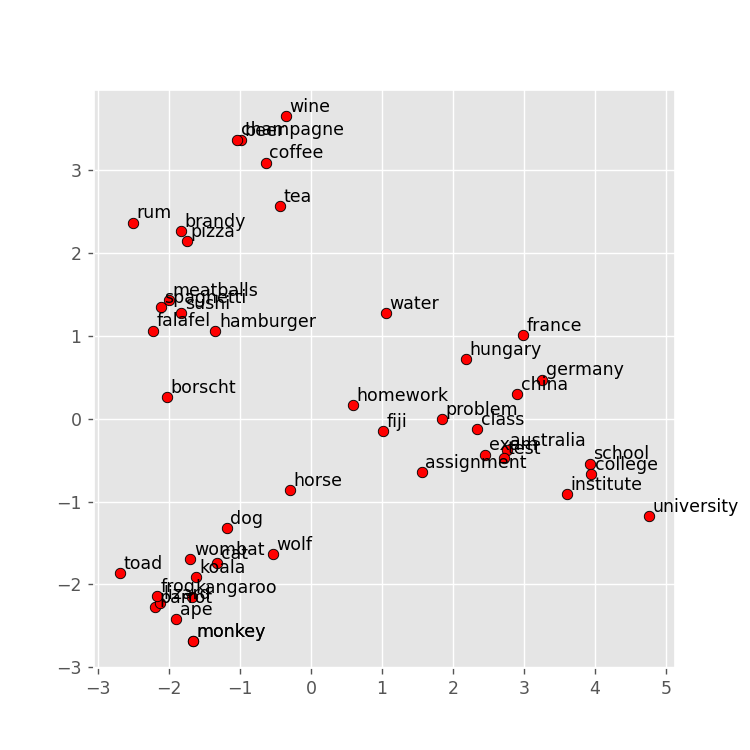

In [18]:
display_pca_scatterplot(word_vectors, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'
                        ])

<IPython.core.display.Javascript object>


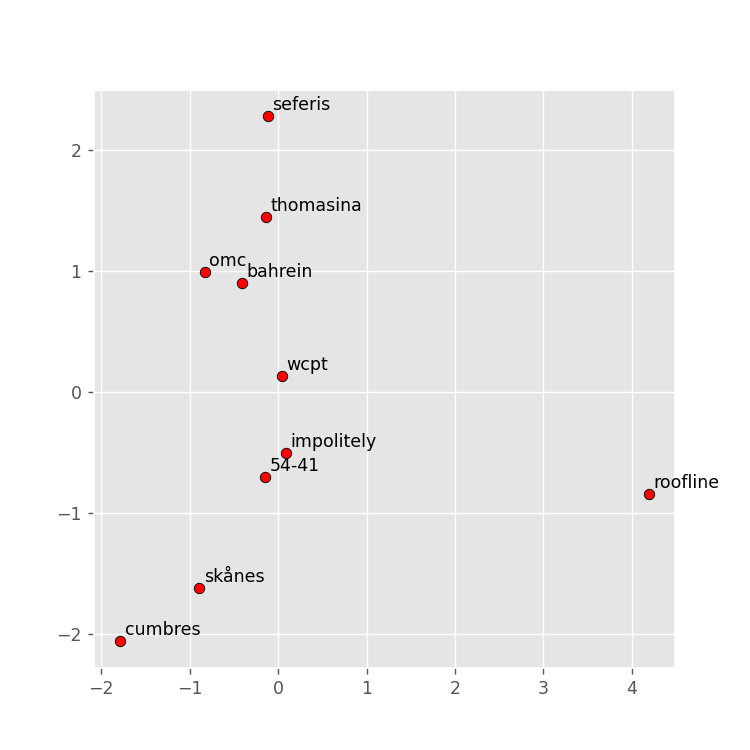

In [19]:
display_pca_scatterplot(word_vectors, sample=10)

# Exercises
* Try different word embeddings (word2vec or glove, trained on different datasets and with different dimensions) and perform the tests above, in order to see their differences.
* Use word embeddings in text classification: we have illustrated above that we can use word embeddings to create vector representations for sentences. Consider to use word embeddings to replace the tf-idf vectors in lab6.1_qa_categorization, and observe the performance. **Hints**: you may use different word embedding versions, and try different strategies to vectorize documents (e.g. instead of computing the average embedding of all words contained in the text, only select the non-function words or words of certain POS tags).  